In [23]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import matplotlib.pyplot as plt
import os
import pandas as pd
import logging
from utils.fnSampling import sample_directory
import tensorflow as tf
import os
import pandas as pd
from datetime import datetime
import logging

print(tf.__version__)
gpus = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))

2.10.1
Num GPUs Available:  1


In [1]:
'''Time stratified random sample of message board data that I'll use to train a generative language model, generating text that is similar to that date range of the data.'''
from utils.fnSampling import *
# Sample Usage
directory = 'D:/4chan/processed/processed/batched'
time_column = 'posted_date_time' # Startifiy on the posted date time
freq = 'H' # Stratification frequency by hour
sample_ratio = 0.1
start_date = '0623' # All data from June 2023 to October 2023
end_date = '1023'
sampled_data = sample_data_by_prefix(directory, time_column, freq, sample_ratio, start_date, end_date)

INFO:root:Processed file 0623_111047.parquet. Sampled Data Size: 11103
INFO:root:Processed file 0623_116.parquet. Sampled Data Size: 11108
INFO:root:Processed file 0623_12314.parquet. Sampled Data Size: 12340
INFO:root:Processed file 0623_140330.parquet. Sampled Data Size: 26378
INFO:root:Processed file 0623_15261.parquet. Sampled Data Size: 27897
INFO:root:Processed file 0623_2.parquet. Sampled Data Size: 27897
INFO:root:Processed file 0623_22990.parquet. Sampled Data Size: 30196
INFO:root:Processed file 0623_314418.parquet. Sampled Data Size: 61637
INFO:root:Processed file 0623_32061.parquet. Sampled Data Size: 64831
INFO:root:Processed file 0623_331340.parquet. Sampled Data Size: 97964
INFO:root:Processed file 0623_3465360.parquet. Sampled Data Size: 444506
INFO:root:Processed file 0623_3564068.parquet. Sampled Data Size: 800919
INFO:root:Processed file 0623_3564186.parquet. Sampled Data Size: 1157341
INFO:root:Processed file 0623_36175.parquet. Sampled Data Size: 1160962
INFO:root:

Minimum date: 2023-06-01 00:00:00
Maximum date: 2023-10-20 06:00:27


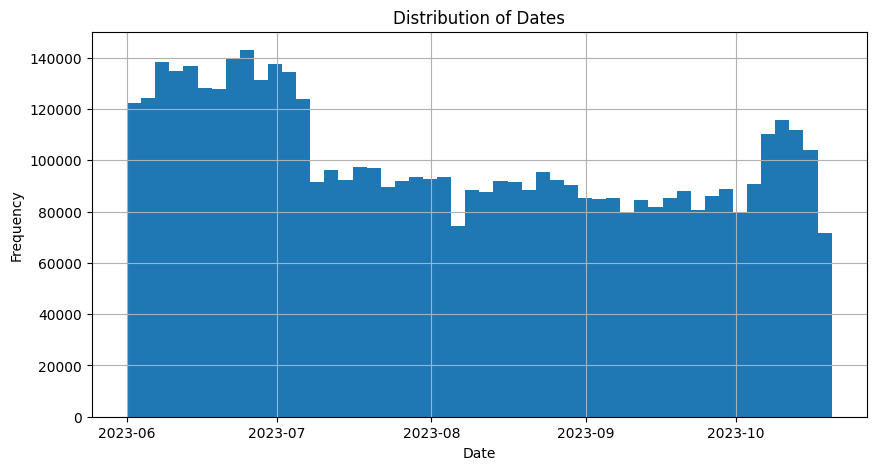

In [3]:
from utils import fnPlots
fnPlots.profile_date_plot(sampled_data, 'posted_date_time')

In [ ]:
from utils.fnProcessing import find_dialogs, augment_dialogs

'''Search for thread_ids in the text_clean column and return a dataframe that can be considered dialog or discourse between users'''

thread_headers = sampled_data.dropna(subset=['text_clean','posted_comment'])[['thread_id', 'thread_header', 'posted_comment', 'text_clean', 'posted_date_time']]
replies = find_dialogs(thread_headers)
replies = augment_dialogs(replies, sampled_data)

In [ ]:
replies.to_parquet('sampled_0623_1023_replies.parquet')